# PLOT amplification effect
## Uses:
    - hom_ampl_C
    - hom_ampl_CP
    - hom_P-2Pr
    - hom_REF_P2010_equ
    
# Result is not an amplification

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import gridspec
fs=20 #fontsize for labels, legend, ...
font={'family' : 'serif', 'size' : fs} #define font for legend
plt.rc('font', **font)

In [6]:
def get_time(y):
    return (y+54783-1-1810)*360-0.5
def get_year(t):
    return (t+0.5)/360 +1810+1-54783
    #return (t+54783-1-1810)*360-0.5
get_time(2010)
get_year(19793519.5)


2010.0

In [7]:
climber_path='/home/peter/PIK/climber/'

In [8]:
mainfolder=climber_path+"cluster_results/data_Mai8files/"
reffolder=mainfolder
SSP=False
p_name="hom_P-2Pr"

cp_name="hom_ampl_CP"
c_name="hom_ampl_C"
refname="hom_REF_P2010_equ"
#refname="REF_sol2"#"RESTandREF_fourth"
folder_p=mainfolder+"c3beta_anthrHeat_"+p_name+'/'
folder_ref=reffolder+"c3beta_anthrHeat_"+refname+'/'
folder_cp=mainfolder+"c3beta_anthrHeat_"+cp_name+'/'
folder_c =mainfolder+"c3beta_anthrHeat_"+c_name+'/'


In [9]:
data_ref= xr.open_dataset(folder_ref+"history_p2_short.nc", decode_times=False)
data_p= xr.open_dataset(folder_p+"history_p2_short.nc", decode_times=False)
data_cp=xr.open_dataset(folder_cp+"history_p2_short.nc", decode_times=False)
data_c=xr.open_dataset(folder_c+"history_p2_short.nc", decode_times=False)

In [10]:
if SSP:
    growth="SSP5-opt"+opt+ "-scenario"
else:
    growth="2%-growth"
plot_name="ampl_"+p_name+"_"+cp_name
title_name="Amplification due to simultanoues CO2"+"\n"+"with "+growth+"-growth of $P_{hum}$"+"\n"+\
"using "+p_name+"_"+cp_name+"_"+c_name

In [11]:
print("Starting and end time of histories of Ref and P are:")
print(get_year(np.array(data_ref.Time[0])), get_year(np.array(data_ref.Time[-1])))
print(get_year(np.array(data_p.Time[0])), get_year(np.array(data_p.Time[-1])))
print(get_year(np.array(data_cp.Time[0])), get_year(np.array(data_cp.Time[-1])))
print(get_year(np.array(data_c.Time[0])), get_year(np.array(data_c.Time[-1])))

Starting and end time of histories of Ref and P are:
(1810.0, 2130.0)
(1810.0, 2130.0)
(1810.0, 2100.0)
(1810.0, 2100.0)


In [12]:
def area_mean_lon(x, lats=data_ref.yt_j, lon=data_ref.xt_i):
    '''x should have dimensions: lat,lon'''
    weights=np.cos(lats*np.pi/180)
    irrelevant,real_weights=np.meshgrid(lon, weights)
    z=real_weights*x
    return np.sum(z)/np.sum(real_weights)

In [13]:
ref_mean=[]
p_mean=[]
cp_mean=[]
c_mean=[]
double_years=np.arange(1980, 2100, step=1)
for y in double_years:
    ref_mean.append(area_mean_lon(data_ref.ts_ann.sel(Time=get_time(y))))
    p_mean.append(area_mean_lon(data_p.ts_ann.sel(Time=get_time(y))))
    cp_mean.append(area_mean_lon(data_cp.ts_ann.sel(Time=get_time(y))))
    c_mean.append(area_mean_lon(data_c.ts_ann.sel(Time=get_time(y))))

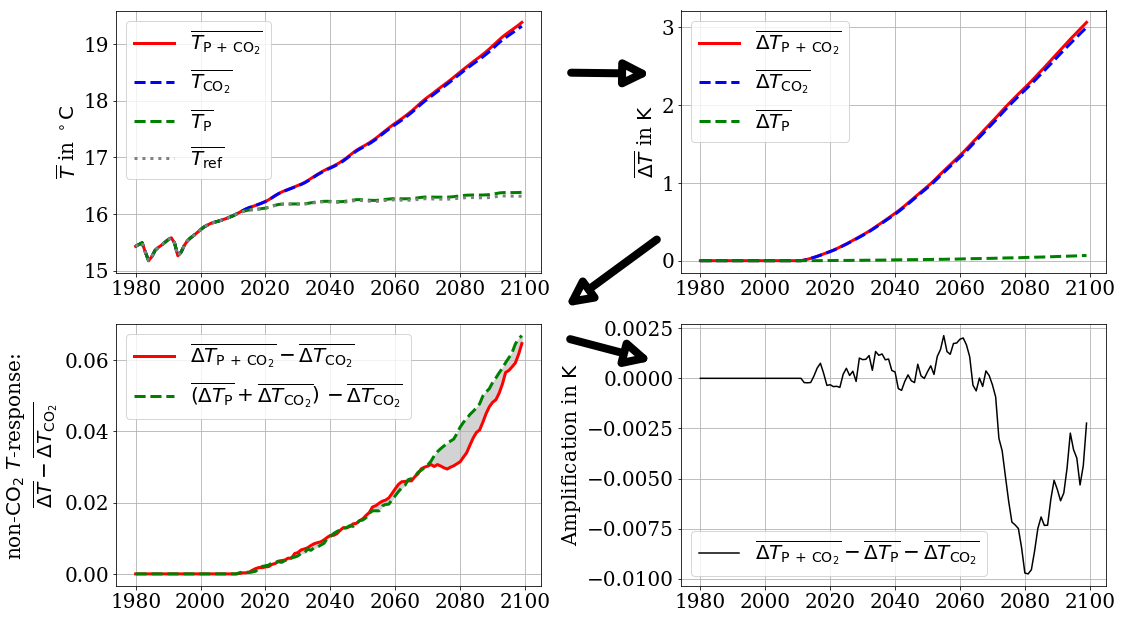

In [18]:
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(221)
ax2=fig.add_subplot(222)

ax.plot(double_years, cp_mean , '-' , lw=3, color='red', label=r"$\overline{T_{\rm P\,+\,CO_2}}$")
ax.plot(double_years, c_mean  , '--', lw=3, color='blue', label=r"$\overline{T_{\rm CO_2}}$")
ax.plot(double_years, p_mean  , '--', lw=3, color='green', label=r"$\overline{T_{\rm P}}$")
ax.plot(double_years, ref_mean, ':' , lw=3, color='gray', label=r"$\overline{T_{\rm ref}}$")
ax.set_ylabel(r"$\overline{T}$ in ${\rm ^\circ C}$")
ax.grid()
ax.legend()

difference_dcp=np.array(cp_mean)-np.array(ref_mean)
difference_dp=np.array(p_mean)-np.array(ref_mean)
difference_dc=np.array(c_mean)-np.array(ref_mean)
#ax2.fill_between(double_years, difference-std_dev_neg, difference+std_dev_pos, alpha=0.2, color='gray')
ax2.plot(double_years, difference_dcp, '-',  lw=3, color='red', label=r"$\overline{\Delta T_{\rm P\,+\,CO_2}}$")
ax2.plot(double_years, difference_dc , '--', lw=3, color='blue', label=r"$\overline{\Delta T_{\rm CO_2}}$")
ax2.plot(double_years, difference_dp , '--', lw=3, color='green', label=r"$\overline{\Delta T_{\rm P}}$")
ax2.set_ylabel(r"$\overline{\Delta T} $ in ${\rm K}$")
ax2.grid()
ax2.legend()
from matplotlib.patches import ConnectionPatch
con = ConnectionPatch(xyA=(ax.get_xlim()[1],18.5), xyB=(ax2.get_xlim()[0],2.4), coordsA="data", coordsB="data",
                      axesA=ax, axesB=ax2, color="black", lw=8, arrowstyle="-|>", shrinkA=30, shrinkB=30,
                      mutation_scale=50, fc="w")
ax.add_artist(con)



ax3=fig.add_subplot(223)
ax3.plot(double_years, difference_dcp - difference_dc, '-', lw=3, color='red', 
         label=r"$\overline{\Delta T_{\rm P\, +\, CO_2}} - \overline{\Delta T_{\rm CO_2}}$")
ax3.plot(double_years, difference_dc+difference_dp - difference_dc, '--', lw=3, color='green',
         label=r"$\overline{(\Delta T_{\rm P}} + \overline{ \Delta  T_{\rm CO_2}}) \,  - \overline{\Delta T_{\rm CO_2}}$")
#ax3.plot(double_years, difference_dc - difference_dc,  '--', lw=3, color='blue',
#         label=r"$\overline{ \Delta T_{\rm CO_2}} - \overline{\Delta T_{\¶m CO_2}}$")
ax3.grid()
ax3.legend()
ax3.set_ylabel(r"non-${\rm CO_2}$ $T$-response: "+"\n"+r"$\overline{\Delta T}-\overline{\Delta T_{\rm CO_2}}$")
ax3.fill_between(double_years, difference_dc+difference_dp - difference_dc, difference_dcp - difference_dc, color='lightgrey')

con = ConnectionPatch(xyA=(ax2.get_xlim()[0],0.5), xyB=(ax3.get_xlim()[1],0.07), coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax3, color="black", lw=8, arrowstyle="-|>", shrinkA=30, shrinkB=30,
                      mutation_scale=50, fc="w")
ax2.add_artist(con)


ax4=fig.add_subplot(224)
#ax4.plot(double_years, difference_dp+difference_dc)
#ax4.plot(double_years, difference_dc, '--', alpha=0.5)
ax4.plot(double_years, difference_dcp- (difference_dp+difference_dc), color='black', 
         label=r"$\overline{\Delta T_{\rm P\, + \, CO_2}} - \overline{\Delta T_{\rm P}} - \overline{\Delta T_{\rm CO_2}}$")
#ax4.set_ylabel("Amplification of \n simultaneos $P_{hum}$- \n and $CO_2$-growth \n in $K$")
ax4.set_ylabel(r"Amplification in ${\rm K}$")
ax4.grid()
ax4.legend()

con = ConnectionPatch(xyA=(ax3.get_xlim()[1],0.068), xyB=(ax4.get_xlim()[0],0.0005), coordsA="data", coordsB="data",
                      axesA=ax3, axesB=ax4, color="black", lw=8, arrowstyle="-|>", shrinkA=30, shrinkB=30,
                      mutation_scale=50, fc="w")
ax3.add_artist(con)

fig.tight_layout()
plt.savefig("amplification.eps", format='eps', bbox_inches='tight')